In [1]:
import numpy as np
import random
from random import randint
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sn
plt.style.use('ggplot')

In [2]:
# Plot matrix of covariance
def plot_cm(population):
    population = np.array(population)
    covMatrix = np.cov(population, bias=True)
    sn.heatmap(covMatrix, annot=True, fmt='g')
    plt.show()


In [3]:
# Fitness functions
def sphere(candidate):
    f = 0
    for s in candidate:
        f += (s ** 2)
    return f

def rosen(candidate):
    f = 0
    for i in range(0,len(candidate) -1 ):
        f += 100 * (candidate[i] ** 2 - candidate[i + 1]) ** 2 + (candidate[i] - 1) ** 2
    return f


SGA

In [4]:
def run_sga(bounds, fitness_obj, mut=0.8, crossp=0.7, popsize=20, its=1000):
    dimensions = len(bounds)
    pop = np.random.rand(popsize, dimensions)
    min_b, max_b = np.asarray(bounds).T
    diff = np.fabs(min_b - max_b)
    pop_denorm = min_b + pop * diff
    fitness = np.asarray([fitness_obj(ind) for ind in pop_denorm])
    best_idx = np.argmin(fitness)
    best = pop_denorm[best_idx]
    for i in range(its):
        for j in range(popsize):
            idxs = [idx for idx in range(popsize) if idx != j]
            a, b, c = pop[np.random.choice(idxs, 3, replace = False)]
            mutant = np.clip(a + mut * (b - c), 0, 1)
            cross_points = np.random.rand(dimensions) < crossp
            if not np.any(cross_points):
                cross_points[np.random.randint(0, dimensions)] = True
            trial = np.where(cross_points, mutant, pop[j])
            trial_denorm = min_b + trial * diff
            f = fitness_obj(trial_denorm)
            if f < fitness[j]:
                fitness[j] = f
                pop[j] = trial
                if f < fitness[best_idx]:
                    best_idx = j
                    best = trial_denorm
        yield best, fitness[best_idx]



CGA

In [5]:
def generate_candidate(vector):
    mean = np.mean(vector)
    std = np.std(vector)
    if std == 0:
        std = 0.9
    value = np.random.normal(mean, std, len(vector))
    return value


def generate_vector(size):
    return [0.0] * size


def compete(a_fitness, b_fitness,a,b):
    if a_fitness < b_fitness:
        return a, a_fitness, b, b_fitness
    else:
        return b, b_fitness, a, a_fitness


def update_vector(vector, winner, loser):
    for i in range(len(vector)):
        if winner[i] != loser[i]:
            vector[i] = winner[i]
    return vector


def run_cga(maximum_generation, chromosome_length,fitness_obj):
    # probabilidade do vetor
    vector = generate_vector(chromosome_length)
    best = []
    best_fitness = 99999999
    best_score_progress =[]
    for i in range(maximum_generation):
        # Generating the first two candidates
        s1 = generate_candidate(vector)
        s2 = generate_candidate(vector)

        # Calculating fitness
        s1_fitness = fitness_obj(s1)
        s2_fitness = fitness_obj(s2)

        # Competition
        winner, winner_fitness, loser, loser_fitness = compete(s1_fitness, s2_fitness, s1, s2)

        # Update the best value
        if len(best) > 0 :
            if winner_fitness < best_fitness:
                best = winner
                best_fitness = winner_fitness
        else:
            best = winner
            best_fitness = winner_fitness

        best_score_progress.append(best_fitness)

        # Updating vector of probabilities
        vector = update_vector(vector, winner, loser)

        #print("generation: {} best value: {} best fitness: {}".format(i + 1, winner, winner_fitness))
    return best_score_progress


Main Method

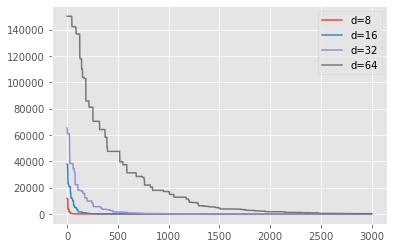

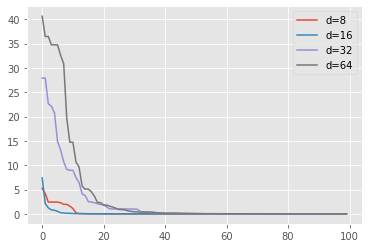

In [6]:
# Mutual Parameters
maximum_generation = 100
population_size = 20
fitness_obj = sphere

# Reais sGA:
chromosome_length = 8
crossover_rate = 0.7
mutation_rate =  0.8
bounds = [(-100, 100)]

# To more high the dimension, more difficult to converge
for chromosome_length in [8, 16, 32, 64]:
    it = list(run_sga(bounds * chromosome_length,fitness_obj, its=3000))
    x, f = zip(*it)
    plt.plot(f, label='d={}'.format(chromosome_length))
plt.legend()
plt.show()

#-------------------------------------

# Reais cGA:
for chromosome_length in [8, 16, 32, 64]:
    best_score_progress_cga = run_cga(maximum_generation, chromosome_length,fitness_obj)
    plt.plot(best_score_progress_cga, label='d={}'.format(chromosome_length))
plt.legend()
plt.show()